# Đọc dữ liệu và tiền xử lý

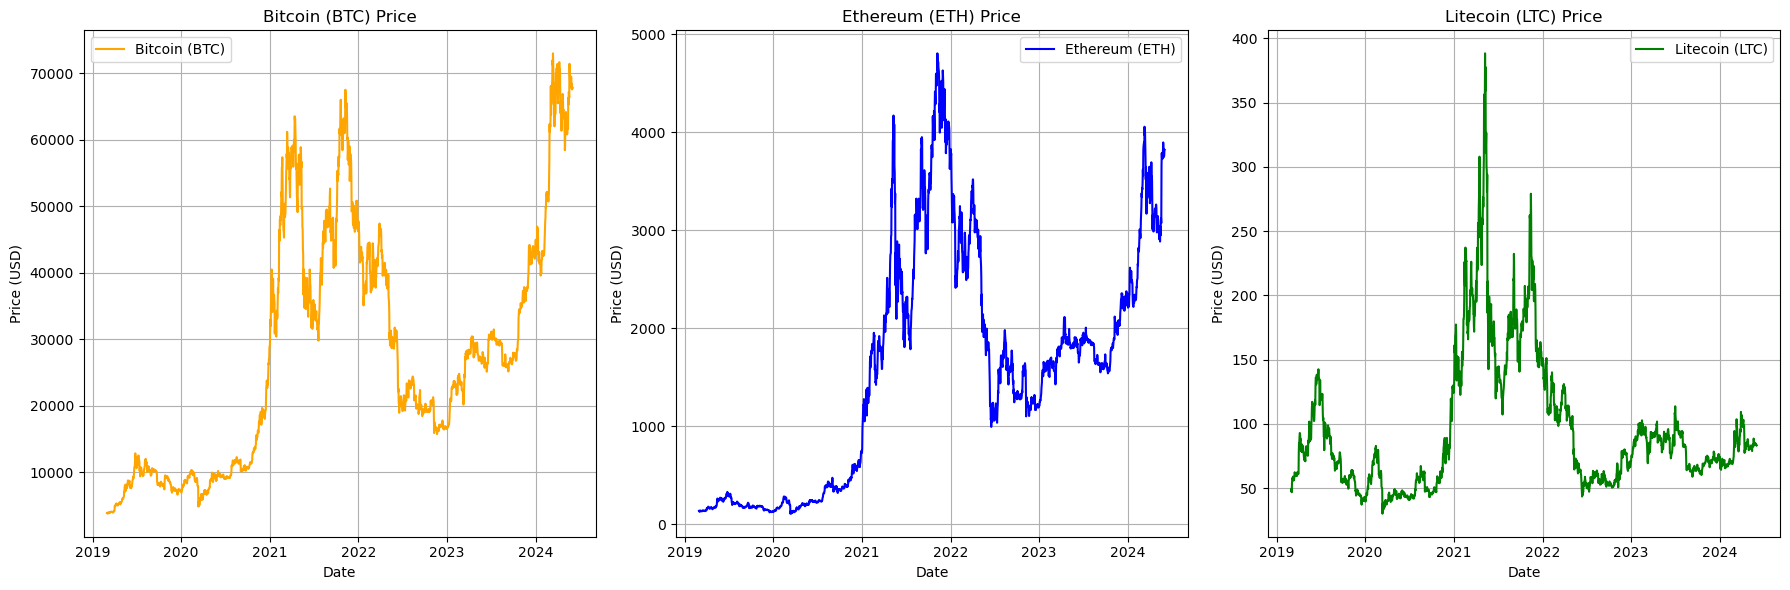

In [115]:
# Import thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

df_btc = pd.read_csv('BTCUSD_d.csv')
df_eth = pd.read_csv('ETHUSD_d.csv')
df_ltc = pd.read_csv('LTCUSD_d.csv')

#định dạng cấu trúc thời gian
df_btc['date'] = pd.to_datetime(df_btc['date'])
df_eth['date'] = pd.to_datetime(df_eth['date'])
df_ltc['date'] = pd.to_datetime(df_ltc['date'])

#Đảo ngược thứ tự dòng
df_btc = df_btc.sort_index(ascending=False)
df_eth = df_eth.sort_index(ascending=False)
df_ltc = df_ltc.sort_index(ascending=False)

# Lấy dữ liệu từ ngày 1/3/2019 đến ngày 1/3/2024
start_date = '2019-03-01'
end_date = '2024-06-02'

df_btc = df_btc.loc[(df_btc['date'] >= start_date) & (df_btc['date'] <= end_date)]
df_eth = df_eth.loc[(df_eth['date'] >= start_date) & (df_eth['date'] <= end_date)]
df_ltc = df_ltc.loc[(df_ltc['date'] >= start_date) & (df_ltc['date'] <= end_date)]

# Lấy date làm index và chỉ lấy cột collumn
df_btc = pd.DataFrame(df_btc,columns=['date','close'])
df_btc.index = df_btc.date
df_btc.drop('date',axis=1,inplace=True)
# Lấy date làm index và chỉ lấy cột 'close' cho Ethereum (ETH)
df_eth = pd.DataFrame(df_eth, columns=['date', 'close'])
df_eth.index = df_eth['date']
df_eth.drop('date', axis=1, inplace=True)
# Lấy date làm index và chỉ lấy cột 'close' cho Litecoin (LTC)
df_ltc = pd.DataFrame(df_ltc, columns=['date', 'close'])
df_ltc.index = df_ltc['date']
df_ltc.drop('date', axis=1, inplace=True)


# Khởi tạo figure và axes với lưới 1x3 (1 hàng, 3 cột)
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Vẽ biểu đồ cho Bitcoin (BTC)
axs[0].plot(df_btc.index, df_btc['close'], label='Bitcoin (BTC)', color='orange')
axs[0].set_title('Bitcoin (BTC) Price')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Price (USD)')
axs[0].legend()
axs[0].grid(True)

# Vẽ biểu đồ cho Ethereum (ETH)
axs[1].plot(df_eth.index, df_eth['close'], label='Ethereum (ETH)', color='blue')
axs[1].set_title('Ethereum (ETH) Price')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Price (USD)')
axs[1].legend()
axs[1].grid(True)

# Vẽ biểu đồ cho Litecoin (LTC)
axs[2].plot(df_ltc.index, df_ltc['close'], label='Litecoin (LTC)', color='green')
axs[2].set_title('Litecoin (LTC) Price')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('Price (USD)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()

# BTC

## Chia 8:2

In [116]:
df1=df_btc.reset_index()['close']
df1

0        3914.0
1        3913.0
2        3885.0
3        3800.3
4        3951.6
         ...   
1916    67720.0
1917    68413.0
1918    67582.0
1919    67759.0
1920    67804.0
Name: close, Length: 1921, dtype: float64

In [117]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [118]:
df1

array([[0.00164312],
       [0.00162867],
       [0.00122403],
       ...,
       [0.9217315 ],
       [0.92428939],
       [0.9249397 ]])

In [119]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1536
Test size: 384


In [120]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [121]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1435, 100)
y_train shape: (1435,)
X_test shape: (283, 100)
y_test shape: (283,)


In [122]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [123]:
X_train.shape

(1435, 100, 1)

In [124]:
X_test.shape

(283, 100, 1)

In [125]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0576 - val_loss: 0.0166
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0089 - val_loss: 0.0150
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0053 - val_loss: 0.0222
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0047 - val_loss: 0.0075
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0035 - val_loss: 0.0098
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0033 - val_loss: 0.0088
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0032 - val_loss: 0.0107
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0030 - val_loss: 0.0049
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0026 - val_loss: 0.0056
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0027 - val_loss: 0.0037
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0025 - val_loss: 0.0032
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

In [127]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [128]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

In [129]:
# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [130]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 2824.7872477925475
Testing MSE: 7979422.995291396
Testing MAPE: 3.863757949747674


In [131]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

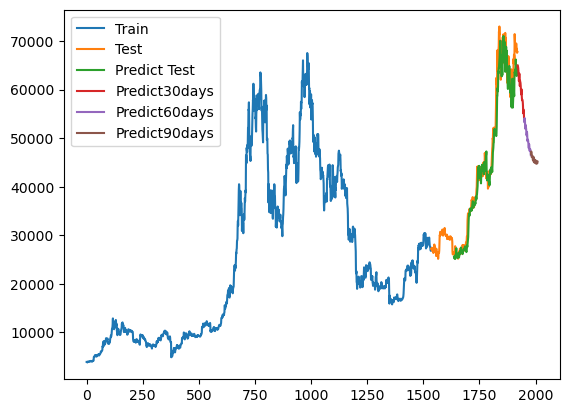

In [132]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 7:3

In [133]:
df1=df_btc.reset_index()['close']
df1

0        3914.0
1        3913.0
2        3885.0
3        3800.3
4        3951.6
         ...   
1916    67720.0
1917    68413.0
1918    67582.0
1919    67759.0
1920    67804.0
Name: close, Length: 1921, dtype: float64

In [134]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [135]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1344
Test size: 576


In [136]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [137]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1243, 100)
y_train shape: (1243,)
X_test shape: (475, 100)
y_test shape: (475,)


In [138]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [139]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [140]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0715 - val_loss: 0.0068
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0103 - val_loss: 0.0106
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0071 - val_loss: 0.0046
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0051 - val_loss: 0.0084
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033 - val_loss: 0.0050
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - val_loss: 0.0045
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0033 - val_loss: 0.0048
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0031 - val_loss: 0.0040
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0034 - val_loss: 0.0038
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0026 - val_loss: 0.0032
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

In [141]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [142]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [143]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 2514.890207922702
Testing MSE: 6324672.757905491
Testing MAPE: 5.202602269050878


In [144]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

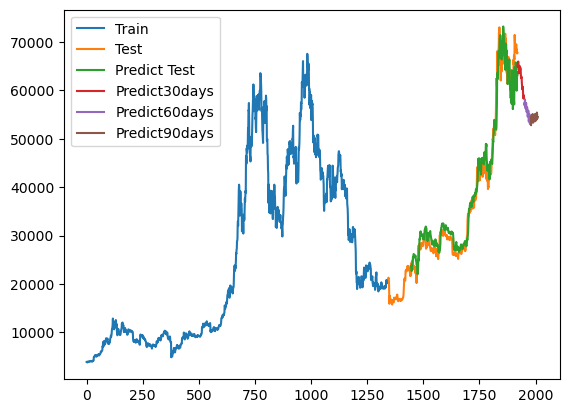

In [145]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 6:4

In [146]:
df1=df_btc.reset_index()['close']
df1

0        3914.0
1        3913.0
2        3885.0
3        3800.3
4        3951.6
         ...   
1916    67720.0
1917    68413.0
1918    67582.0
1919    67759.0
1920    67804.0
Name: close, Length: 1921, dtype: float64

In [147]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [148]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1152
Test size: 768


In [149]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [150]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1051, 100)
y_train shape: (1051,)
X_test shape: (667, 100)
y_test shape: (667,)


In [151]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [152]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [153]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - loss: 0.1134 - val_loss: 0.0307
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0186 - val_loss: 0.0064
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0096 - val_loss: 0.0057
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0078 - val_loss: 0.0066
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0051 - val_loss: 0.0090
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0033 - val_loss: 0.0126
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0029 - val_loss: 0.0122
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - val_loss: 0.0121
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0032 - val_loss: 0.0123
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0040 - val_loss: 0.0110
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0032 - val_loss: 0.0131
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step

In [154]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [155]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [156]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 5758.301676454615
Testing MSE: 33158038.19706003
Testing MAPE: 19.456380201866452


In [157]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

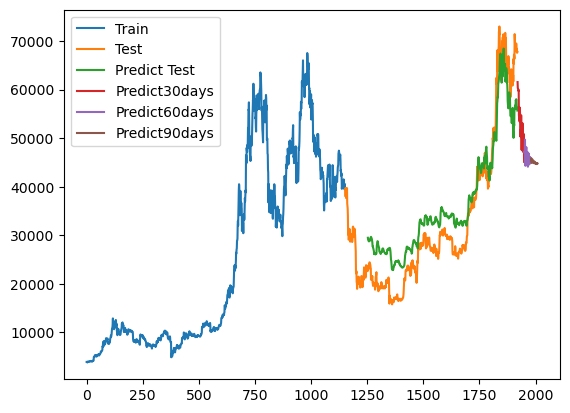

In [158]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

# ETH

## Chia 8:2

In [159]:
df1=df_eth.reset_index()['close']
df1

0        138.50
1        135.60
2        133.23
3        128.39
4        140.00
         ...   
1916    3769.60
1917    3750.50
1918    3764.90
1919    3817.40
1920    3822.80
Name: close, Length: 1921, dtype: float64

In [160]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [161]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1536
Test size: 384


In [162]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [163]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1435, 100)
y_train shape: (1435,)
X_test shape: (283, 100)
y_test shape: (283,)


In [164]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [165]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [166]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0768 - val_loss: 0.0119
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0132 - val_loss: 0.0109
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0079 - val_loss: 0.0072
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0076 - val_loss: 0.0062
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0065 - val_loss: 0.0076
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0053 - val_loss: 0.0078
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0050 - val_loss: 0.0084
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0043 - val_loss: 0.0033
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0037 - val_loss: 0.0105
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0041 - val_loss: 0.0028
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step

In [167]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [168]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [169]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 188.22480585160415
Testing MSE: 35428.57753787407
Testing MAPE: 5.336668187070826


In [170]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

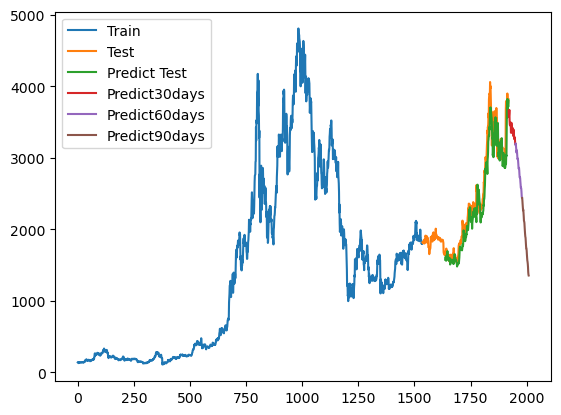

In [171]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 7:3

In [172]:
df1=df_eth.reset_index()['close']
df1

0        138.50
1        135.60
2        133.23
3        128.39
4        140.00
         ...   
1916    3769.60
1917    3750.50
1918    3764.90
1919    3817.40
1920    3822.80
Name: close, Length: 1921, dtype: float64

In [173]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [174]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1344
Test size: 576


In [175]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [176]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1243, 100)
y_train shape: (1243,)
X_test shape: (475, 100)
y_test shape: (475,)


In [177]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [178]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [179]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0874 - val_loss: 0.0082
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0126 - val_loss: 0.0073
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0102 - val_loss: 0.0050
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0087 - val_loss: 0.0054
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0077 - val_loss: 0.0039
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0059 - val_loss: 0.0037
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0046 - val_loss: 0.0025
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0042 - val_loss: 0.0029
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0041 - val_loss: 0.0025
Epoch 12/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

In [180]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [181]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [182]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 124.1098489310829
Testing MSE: 15403.254601696219
Testing MAPE: 3.6362220053291248


In [183]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

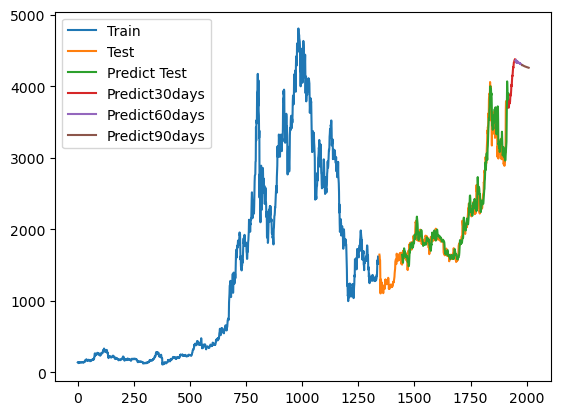

In [184]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 6:4

In [185]:
df1=df_eth.reset_index()['close']
df1

0        138.50
1        135.60
2        133.23
3        128.39
4        140.00
         ...   
1916    3769.60
1917    3750.50
1918    3764.90
1919    3817.40
1920    3822.80
Name: close, Length: 1921, dtype: float64

In [186]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [187]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1152
Test size: 768


In [188]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [189]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1051, 100)
y_train shape: (1051,)
X_test shape: (667, 100)
y_test shape: (667,)


In [190]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [191]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [192]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 0.0912 - val_loss: 0.0049
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0124 - val_loss: 0.0053
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0085 - val_loss: 0.0047
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0072 - val_loss: 0.0057
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0066 - val_loss: 0.0094
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0066 - val_loss: 0.0054
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0058 - val_loss: 0.0102
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0048 - val_loss: 0.0080
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0047 - val_loss: 0.0095
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0047 - val_loss: 0.0061
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

In [193]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [194]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [195]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 311.37465997538715
Testing MSE: 96954.17887478795
Testing MAPE: 16.55523724811153


In [196]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

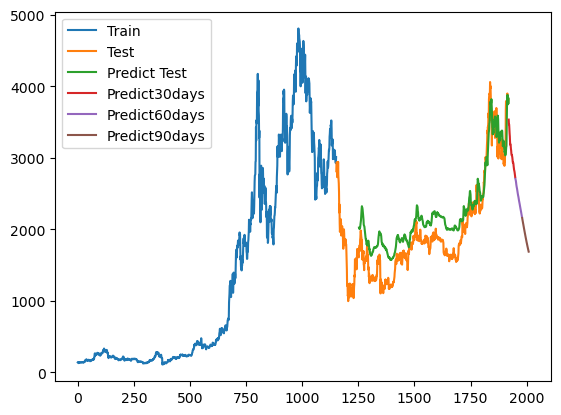

In [197]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

# LTC

## Chia 8:2

In [198]:
df1=df_ltc.reset_index()['close']
df1

0       48.150
1       49.570
2       48.880
3       46.820
4       53.840
         ...  
1916    83.631
1917    84.465
1918    83.330
1919    83.519
1920    83.351
Name: close, Length: 1921, dtype: float64

In [199]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [200]:
# 4. Chia train test
train_size = int(0.8 * len(df1))
test_size = int(0.2 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1536
Test size: 384


In [201]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [202]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1435, 100)
y_train shape: (1435,)
X_test shape: (283, 100)
y_test shape: (283,)


In [203]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [204]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [205]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - loss: 0.0317 - val_loss: 0.0015
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0081 - val_loss: 0.0014
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0067 - val_loss: 5.6498e-04
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0051 - val_loss: 6.5326e-04
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0045 - val_loss: 6.1347e-04
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0042 - val_loss: 5.3414e-04
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0039 - val_loss: 4.5640e-04
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0035 - val_loss: 0.0016
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0043 - val_loss: 6.9382e-04
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0031 - val_loss: 0.0010
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0027 - val_loss: 5.7049e-04
Epoch 12/100
23/23 ━━━━━

In [206]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [207]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [208]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 5.195595208243025
Testing MSE: 26.994209567917878
Testing MAPE: 4.456546149765963


In [209]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

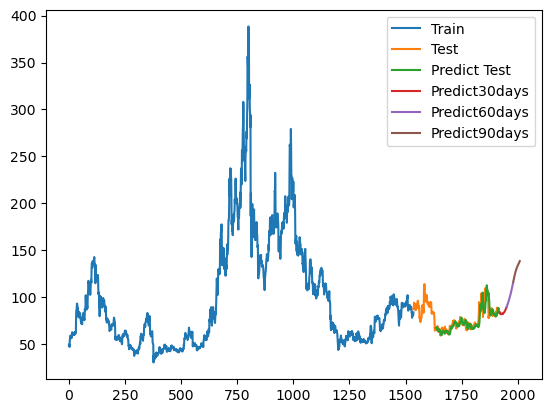

In [210]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 7:3

In [211]:
df1=df_ltc.reset_index()['close']
df1

0       48.150
1       49.570
2       48.880
3       46.820
4       53.840
         ...  
1916    83.631
1917    84.465
1918    83.330
1919    83.519
1920    83.351
Name: close, Length: 1921, dtype: float64

In [212]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [213]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1344
Test size: 576


In [214]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [215]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1243, 100)
y_train shape: (1243,)
X_test shape: (475, 100)
y_test shape: (475,)


In [216]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [217]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [218]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0411 - val_loss: 0.0010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0103 - val_loss: 9.2882e-04
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0086 - val_loss: 8.1091e-04
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0059 - val_loss: 0.0013
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0052 - val_loss: 0.0012
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0050 - val_loss: 6.8897e-04
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0037 - val_loss: 7.6805e-04
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0036 - val_loss: 7.6482e-04
Epoch 9/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0037 - val_loss: 8.2892e-04
Epoch 10/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0036 - val_loss: 5.3052e-04
Epoch 11/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0031 - val_loss: 5.6848e-04
Epoch 12/100
20/20 ━

In [219]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [220]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [221]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 7.032862599343385
Testing MSE: 49.461156341243004
Testing MAPE: 5.765155216445342


In [222]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

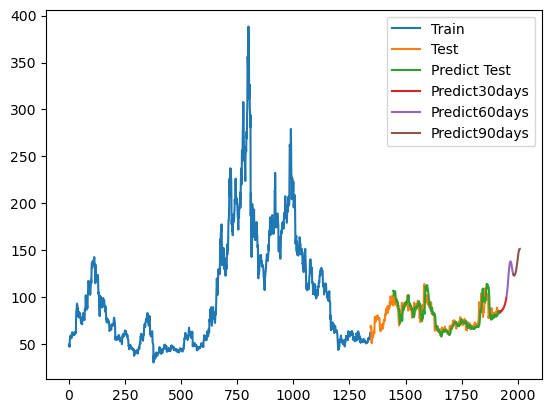

In [223]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()

## Chia 6:4

In [224]:
df1=df_ltc.reset_index()['close']
df1

0       48.150
1       49.570
2       48.880
3       46.820
4       53.840
         ...  
1916    83.631
1917    84.465
1918    83.330
1919    83.519
1920    83.351
Name: close, Length: 1921, dtype: float64

In [225]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [226]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

# In kích thước của tập huấn luyện và tập kiểm tra
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")

Train size: 1152
Test size: 768


In [227]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [228]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

# In kích thước của tập dữ liệu huấn luyện và kiểm tra để kiểm tra
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {ytest.shape}")

X_train shape: (1051, 100)
y_train shape: (1051,)
X_test shape: (667, 100)
y_test shape: (667,)


In [229]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [230]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Flatten

# Define the model
model = Sequential()

# CNN layers
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(100, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# LSTM layers
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100))

# Dense layer
model.add(Dense(1))
# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')


C:\Users\hoang\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [231]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0411 - val_loss: 0.0027
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0117 - val_loss: 8.3334e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0093 - val_loss: 0.0013
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0070 - val_loss: 7.4348e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0055 - val_loss: 0.0013
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0053 - val_loss: 6.5577e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0053 - val_loss: 7.7523e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0050 - val_loss: 0.0015
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0049 - val_loss: 7.3903e-04
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0041 - val_loss: 5.1059e-04
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0033 - val_loss: 5.6981e-04
Epoch 12/100
17/17 ━━━━━

In [232]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [233]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

# Chuẩn hóa dữ liệu y_test
y_test_scaled = scaler.inverse_transform(ytest.reshape(-1, 1))

In [234]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE, MSE, MAPE
test_rmse = np.sqrt(np.mean((y_pred - y_test_scaled)**2))
test_mse = np.mean((y_pred - y_test_scaled)**2)
test_mape = np.mean(np.abs((y_test_scaled - y_pred) / y_test_scaled)) * 100

print('Testing RMSE:', test_rmse)
print('Testing MSE:', test_mse)
print('Testing MAPE:', test_mape)


Testing RMSE: 8.315006989657775
Testing MSE: 69.13934123805764
Testing MAPE: 8.11387366537012


In [235]:
# 13. Hàm dự đoán cho n ngày tiếp theo
def predict_future_days(n_days, test_data, model):
    x_input = test_data[60:].reshape(1, -1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    
    lst_output = []
    n_steps=x_input.shape[1]
    i=0
    while(i< n_days):
        if(len(temp_input)>x_input.shape[1]):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            #print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            #print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            #print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            #print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    
    return lst_output

# Dự đoán 30 ngày tiếp theo
predicted_30_days = predict_future_days(30, test_data, model)

# Dự đoán 60 ngày tiếp theo
predicted_60_days = predict_future_days(60, test_data, model)

# Dự đoán 90 ngày tiếp theo
predicted_90_days = predict_future_days(90, test_data, model)

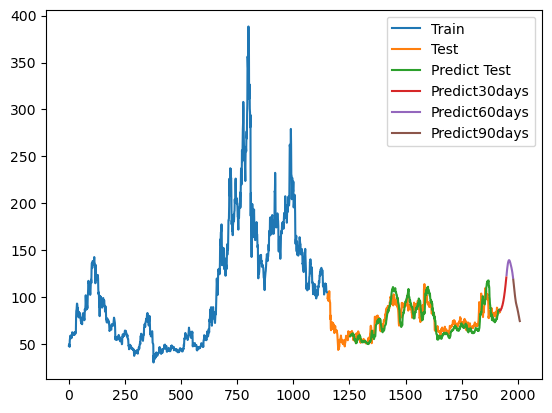

In [236]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))

test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))

test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))

# Vẽ dữ liệu dự đoán 30 ngày
predict_30days_index = pd.RangeIndex(start=len(df1) - 1, stop=len(df1) + 30 - 1, step=1)
plt.plot(predict_30days_index, scaler.inverse_transform(predicted_30_days))

# Vẽ dữ liệu dự đoán 60 ngày
predict_60days_index = pd.RangeIndex(start=len(df1) + 30 - 1, stop=len(df1) + 60 - 1, step=1)
plt.plot(predict_60days_index, scaler.inverse_transform(predicted_60_days)[30:])

# Vẽ dữ liệu dự đoán 90 ngày
predict_90days_index = pd.RangeIndex(start=len(df1) +60 -1, stop=len(df1) + 90 - 1, step=1)
plt.plot(predict_90days_index, scaler.inverse_transform(predicted_90_days)[60:])

plt.legend(['Train','Test','Predict Test','Predict30days','Predict60days','Predict90days'])
plt.show()